In [1]:
######################################################
# Sales Prediction with Linear Regression
######################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import warnings 
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
######################################################
# Simple Linear Regression with OLS Using Scikit-Learn
######################################################

df = pd.read_csv("datasets/advertising.csv")
df.shape

X = df[["TV"]]
y = df[["sales"]]

In [3]:
##########################
# Model
##########################

reg_model = LinearRegression().fit(X, y)

# y_hat = b + w*TV

In [4]:
# sabit (b - bias)
reg_model.intercept_[0]

7.032593549127695

In [5]:
# tv'nin katsayısı (w1)
reg_model.coef_[0][0]

0.04753664043301975

In [6]:
##########################
# Tahmin
##########################

# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

In [7]:
# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

30.800913765637567

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


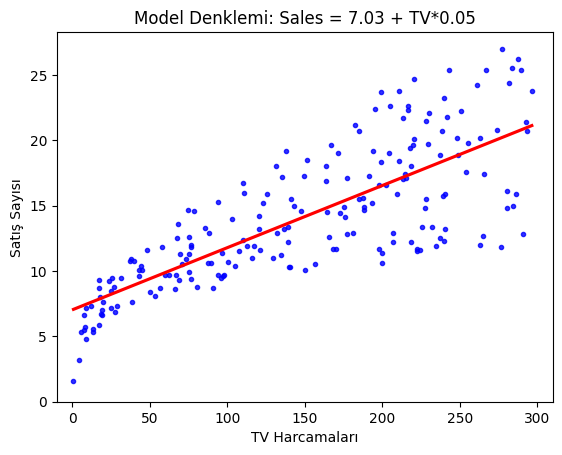

In [9]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [12]:
##########################
# Tahmin Başarısı
##########################

print("mean: ", y.mean())
print("std: ", y.std())

mean:  sales   14.02
dtype: float64
std:  sales   5.22
dtype: float64


In [13]:
# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

10.512652915656757

In [14]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [15]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

In [16]:
# R-KARE
reg_model.score(X, y)

0.611875050850071

In [17]:
######################################################
# Multiple Linear Regression
######################################################

df = pd.read_csv("datasets/advertising.csv")

X = df.drop('sales', axis=1)

y = df[["sales"]]

In [18]:
##########################
# Model
##########################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

y_test.shape
y_train.shape

(160, 1)

In [20]:
reg_model = LinearRegression().fit(X_train, y_train)

# sabit (b - bias)
print("sabit: ", reg_model.intercept_)

# coefficients (w - weights)
print("coefficients: ", reg_model.coef_)

sabit:  [2.90794702]
coefficients:  [[0.0468431  0.17854434 0.00258619]]


In [22]:
##########################
# Tahmin
##########################

# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# 2.90
# 0.0468431 , 0.17854434, 0.00258619

# Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619

yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

reg_model.predict(yeni_veri)

array([[6.202131]])

In [23]:
##########################
# Tahmin Başarısını Değerlendirme
##########################

# Train RMSE
y_pred = reg_model.predict(X_train)
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred)))

# TRAIN RKARE
print("TRAIN RKARE: ",reg_model.score(X_train, y_train))

# Test RMSE
y_pred = reg_model.predict(X_test)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# Test RKARE
print("Test RKARE: ", reg_model.score(X_test, y_test))

Train RMSE:  1.736902590147092
TRAIN RKARE:  0.8959372632325174
Test RMSE:  1.411341755858159
Test RKARE:  0.8927605914615384


In [24]:
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

1.6913531708051799

In [25]:
# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

1.7175247278732086

In [26]:
######################################################
# Simple Linear Regression with Gradient Descent from Scratch
######################################################

# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse

In [27]:
# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

In [28]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w

In [29]:
df = pd.read_csv("datasets/advertising.csv")

X = df["radio"]
Y = df["sales"]

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 100000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25